Chromatic number: 3


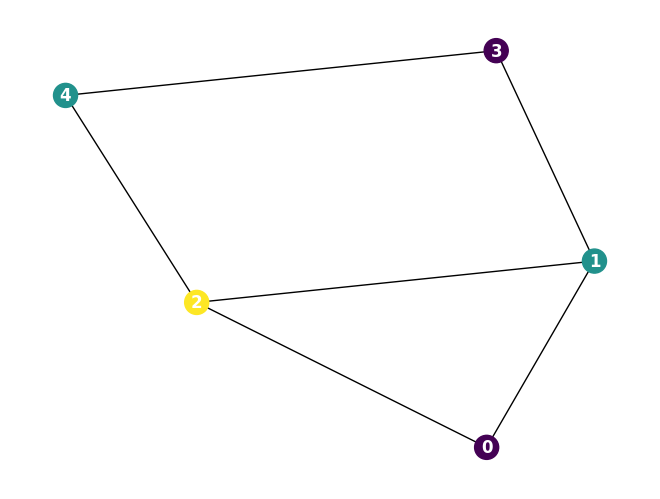

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def hybrid_coloring(graph):
    def backtrack_coloring(graph, vertex, colors):
        if vertex == len(graph):
            return colors

        used_colors = set(colors.get(neighbour) for neighbour in graph[vertex])
        available_colors = set(range(len(graph))) - used_colors

        for color in sorted(available_colors):
            colors[vertex] = color
            result = backtrack_coloring(graph, vertex + 1, colors)
            if result:
                return result

        del colors[vertex]
        return None

    def greedy_coloring(graph):
        colors = {}
        for vertex in graph:
            used_colors = set(colors.get(neighbour) for neighbour in graph[vertex])
            available_colors = set(range(len(graph))) - used_colors
            color = min(available_colors)
            colors[vertex] = color
        return colors

    # Use the greedy algorithm as a starting point
    colors = greedy_coloring(graph)

    # Attempt to improve the coloring with backtracking
    improved_colors = backtrack_coloring(graph, 0, colors)
    if improved_colors:
        return improved_colors
    else:
        return colors

def chromatic_number(graph):
    coloring = greedy_coloring(graph)
    chromatic_number = max(coloring.values()) + 1
    return chromatic_number

def visualize_graph_with_colors(graph, colors):
    G = nx.Graph()
    pos = nx.spring_layout(graph)
    for vertex in graph:
        G.add_node(vertex, pos=pos[vertex])
    for u, v in graph.edges():
        G.add_edge(u, v)
    color_map = [colors.get(node, 0) for node in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=color_map, font_color='white', font_weight='bold')
    plt.show()

# Example usage
graph = nx.Graph()
graph.add_edges_from([(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4)])
chromatic_number = chromatic_number(graph)
colors = greedy_coloring(graph)
print("Chromatic number:", chromatic_number)
visualize_graph_with_colors(graph, colors)


Find cycles from graph

In [1]:
N = 100000
graph = [[] for i in range(N)]
cycles = [[] for i in range(N)]
 

def dfs_cycle(u, p, color: list,
              par: list):
    global cyclenumber
 
    if color[u] == 2:
        return

    if color[u] == 1:
        v = []
        cur = p
        v.append(cur)
 
        while cur != u:
            cur = par[cur]
            v.append(cur)
        cycles[cyclenumber] = v
        cyclenumber += 1
 
        return
 
    par[u] = p
 
    color[u] = 1

    for v in graph[u]:
        if v == par[u]:
            continue
        dfs_cycle(v, u, color, par)

    color[u] = 2
 
def addEdge(u, v):
    graph[u].append(v)
    graph[v].append(u)
 
def printCycles():
    for i in range(0, cyclenumber):
 
        print("Cycle Number %d:" % (i+1), end = " ")
        for x in cycles[i]:
            print(x, end = " ")
        print()
 
if __name__ == "__main__":
 
    addEdge(1, 2)
    addEdge(2, 3)
    addEdge(3, 4)
    addEdge(4, 6)
    addEdge(4, 7)
    addEdge(5, 6)
    addEdge(3, 5)
    addEdge(7, 8)
    addEdge(6, 10)
    addEdge(5, 9)
    addEdge(10, 9)
    addEdge(10, 11)
    addEdge(11, 12)
    addEdge(11, 13)
    addEdge(12, 13)
 
    color = [0] * N
    par = [0] * N

    cyclenumber = 0
    dfs_cycle(1, 0, color, par)
    printCycles()

Cycle Number 1: 5 6 4 3 
Cycle Number 2: 10 9 5 6 
Cycle Number 3: 13 12 11 


In [2]:
import networkx as nx
import matplotlib.pyplot as plt


In [3]:
G = nx.Graph()

# Add edges
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 6), (4, 7), (5, 6), (3, 5), (7, 8),
                  (6, 10), (5, 9), (10, 9), (10, 11), (11, 12), (11, 13), (12, 13)])


In [4]:
cycles = nx.simple_cycles(G)


In [5]:
cycles

<generator object simple_cycles at 0x7f8ea939ca50>

In [6]:
highlighted_graph = G.copy()


In [7]:
for cycle in cycles:
    for i in range(len(cycle)):
        node1 = cycle[i]
        node2 = cycle[(i + 1) % len(cycle)]
        highlighted_graph[node1][node2]['color'] = 'red'


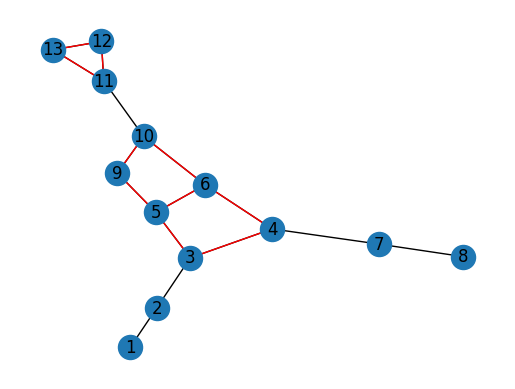

In [8]:
pos = nx.spring_layout(G)  # Positions of nodes

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)

# Draw highlighted edges
highlighted_edges = [(u, v) for (u, v, d) in highlighted_graph.edges(data=True) if 'color' in d and d['color'] == 'red']
nx.draw_networkx_edges(highlighted_graph, pos, edgelist=highlighted_edges, edge_color='red')

# Draw labels
nx.draw_networkx_labels(G, pos)

# Show the plot
plt.axis('off')
plt.show()


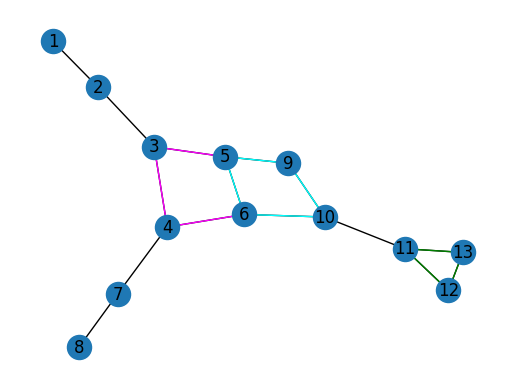

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 6), (4, 7), (5, 6), (3, 5), (7, 8),
                  (6, 10), (5, 9), (10, 9), (10, 11), (11, 12), (11, 13), (12, 13)])

cycles = nx.simple_cycles(G)

highlighted_graph = G.copy()

colors = ['red', 'magenta', 'cyan', 'green', 'orange','blue', 'purple', 'yellow']

for i, cycle in enumerate(cycles):
    color = colors[i % len(colors)]
    for j in range(len(cycle)):
        node1 = cycle[j]
        node2 = cycle[(j + 1) % len(cycle)]
        highlighted_graph[node1][node2]['color'] = color

pos = nx.spring_layout(G) 

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)

highlighted_edges = [(u, v) for (u, v, d) in highlighted_graph.edges(data=True) if 'color' in d]
colors = [highlighted_graph[u][v]['color'] for (u, v) in highlighted_edges]
nx.draw_networkx_edges(highlighted_graph, pos, edgelist=highlighted_edges, edge_color=colors)

nx.draw_networkx_labels(G, pos)

plt.axis('off')
plt.show()
